
# ICS - Travaux Pratiques 11

15.05.25


<font color=grey>_Ce 11e TP se concentre sur la méthode de Newton ainsi que sur les méthodes de point fixe._ 

_Note : ne vous sentez pas obligé.e.s de finir la série pendant la séance! Celle-ci est conçue de manière à ce que vous gardiez certains exercices pour vos révisions._ </font>

***

## Exercice 1 : Newton

Dans cet exercice, il vous est proposé de déterminer numériquement les zéros de la fonction 
$f(x)=(x+1)^2(x-\frac{3}{2})$. 

Pour ce faire, implémentez la **méthode de Newton** présentée en cours en définissant une fonction `resoudre_par_Newton`$\dots$
* $\dots$ dont les arguments sont la fonction `f` étudiée, le point de départ `x_0` de la méthode, la fonction dérivée `fprime`, la tolérance `eps` et le nombre maximum d'itérations autorisées `k_max` ;
* $\dots$ qui calcule par itérations une approximation d'un zéro de $f$ ;
* $\dots$ qui s'arrête :
    - soit quand la valeur absolue de $f(x_k)$ est inférieure à la tolérance ; 
    - soit quand le nombre maximum d'itérations est atteint ; 
    - si la valeur de la dérivée utilisée à chaque itération est inférieure à `1e-10` pour éviter tout problème de divergence dans la formule utilisée ;
* $\dots$ qui retourne une valeur approchée d'un zéro de $f$, ainsi qu'une liste de tuples, ces tuples contenant les couples $(x_k,f(x_k))$ utilisés à chaque itération $k$. 

Testez votre implémentation en recherchant les deux zéros de la fonction $f$ avec une tolérance de $10^{-8}$. Expérimentez l'efficacité de la méthode selon le point de départ $x_0$ choisi et selon la nature du zéro considéré. Constatez-vous des différences notables ? Si oui, essayez d'en expliquer la raison, notamment en vous basant sur le graphe de cette fonction.

Représentez graphiquement la différence
$$
x_{k} - x_{k-1}
$$
en fonction des itérations. Quelles conclusions peut-on tirer de la comparaison de cette différence à la dernière itération avec la tolérance (sur $f(x_k)$) que nous avons considérée ?

In [1]:
import matplotlib.pyplot as plt
import numpy as np

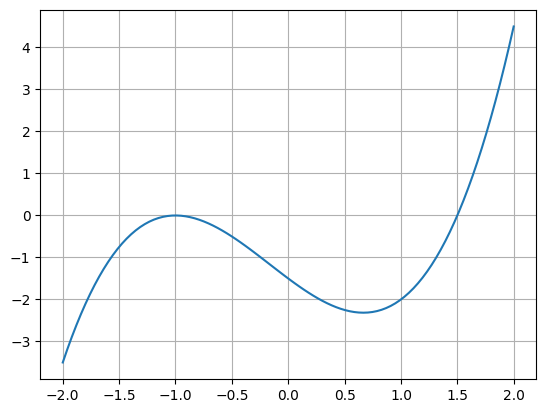

In [2]:
f = lambda x: (x + 1)**2 * (x - 3/2)
plt.plot(x:=np.linspace(-2, 2, 100), f(x))
plt.grid()
plt.show()

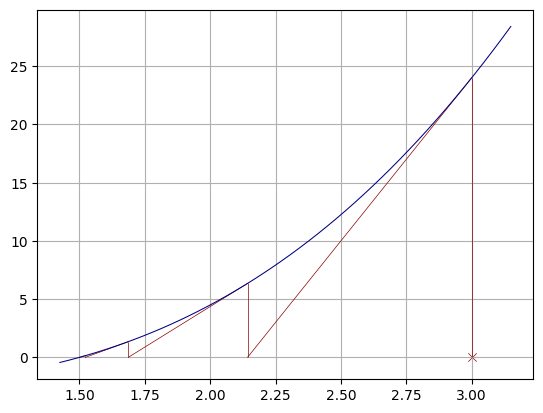

(1.5000000000000135, 7)


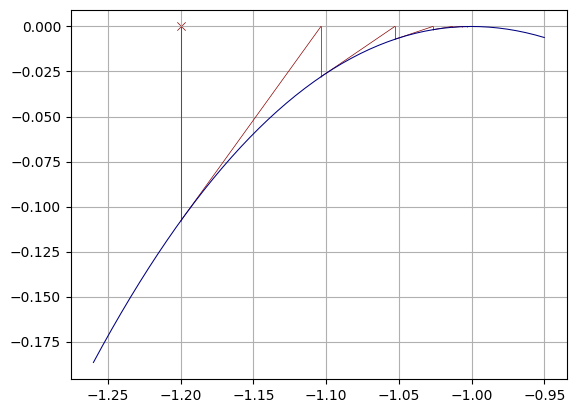

(-1.0000000128514688, 25)


In [3]:
def newton(f, fprime, x_0, tol=-1, nmax=-1):    
    root = x_0
    n = 0
    while True:
        n += 1
        if fprime(root) <= 1e-10:
            break

        newroot = root - f(root) / fprime(root)
        
        if abs(newroot - root) < tol and tol != -1:
            break
        if n >= nmax and nmax != -1:
            break
        
        ## plot
        plt.vlines(root, 0, f(root), linewidth=0.5, color='darkred')
        plt.plot((root, newroot), (f(root), 0), linewidth=0.5, color='darkred')
        ##
        
        root = newroot

    ## plot
    array = [x_0, root]
    plt.scatter(x_0, 0, marker='x', linewidth=0.5, color='darkred')
    plt.plot(x_arr:=np.linspace(min(array) - abs(0.05*min(array)), max(array) + abs(0.05*max(array))), f(x_arr), linewidth=0.75, color='navy')
    plt.grid()
    plt.show()
    ##

    return root, n

print(newton(f, lambda x: 3*x**2 + x - 2, 3, tol=1e-8))
print(newton(f, lambda x: 3*x**2 + x - 2, -1.2, tol=1e-8))

***

## Exercice 2 : k-contraction

Les fonctions de $\mathcal{R}$ dans $\mathcal{R}$, $\displaystyle f(x)=\frac{\cos{(x)}+x}{4}$ et $\displaystyle g(x)=\frac{\cos{(x)}+x^2}{4}$ sont-elles **$K$-contractantes** sur tout intervalle $I$ contenu dans $\mathcal{R}$?

En cas de réponse négative, essayez de trouver un intervalle autour de l'origine dans lequel la fonction est $K$-contractante.

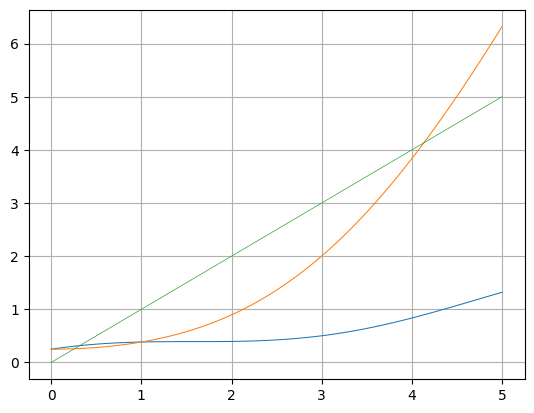

In [4]:
plt.plot(x:=np.linspace(0, 5, 100), (lambda x: (np.cos(x) + x)/4)(x), linewidth=0.75)
plt.plot(x, (lambda x: (np.cos(x) + x**2)/4)(x), linewidth=0.75)
plt.plot(x, x, linewidth=0.5)
plt.grid()
plt.show()

**Réponses:** pour qu'une fonction soit k-contractante sur $I$, il faut que la valeur absolue de sa pente soit inférieure à 1 sur $I$, ça implique entre autre que la fonction ne possède qu'un unique point fixe sur $I$\
Graphiquement, on voit que $g(x)$ ne possède pas un seul point fixe, mais que $f(x)$ en a bien l'air\
Analytiquement:
  1. $f'(x)=\frac{-\sin(x)+1}{4}$, comme $\sin(x)$ est bornée par $[-1;1]$, $f'(x)$ est bornée par $[0;\frac{1}{2}]$\
     $\rightarrow\; f$ est k-contractante sur $\mathbb{R}$
     
  2. $g'(x)=\frac{-\sin(x)+2x}{4}$ n'est pas bornée ($x\rightarrow\infty$), donc $g$ n'est <u>pas</u> k-contractante sur $\mathbb{R}$\
     Par contre, on peut résoudre: $|g'(x)|=|\frac{-\sin(x)+2x}{4}\le 1|\leftrightarrow \sim-2.354\le x\le\;\sim2.354$\
     $\rightarrow$ par exemple, $g$ est k-contractante sur $[-2; 2]$
     

***

## Exercice 3 : Points fixes

Dans cet exercice, il vous est demandé d'étudier les quatre fonctions suivantes :
$$
f(x) = 1-\sin{(x)}\,,~~~~
g(x) = \exp{(-4x)}\,,~~~~
h(x) = 0.4 \exp{(x)}-0.25\,~~~~\hbox{et}~~~~
i(x) = \displaystyle\frac{1}{1+\left(\frac{1-x}{x}\right)^2}\,,
$$
sur l'intervalle ouvert $I=\,]0,1[$.

Pour chacune de ces fonctions, vous devez en particulier $\dots$
- $\dots$ vérifier graphiquement l'existence d'un **unique point fixe** sur $I$ (en représentant la **fonction "identité"** $y(x)=x$) ;
- $\dots$ choisir deux valeurs différentes pour le point de départ $x_0$ et d'effectuer un certain nombre d'**itérations de la méthode de Picard** (en les représentant graphiquement sur la même figure) ;
- $\dots$ déterminer la nature du point fixe (**répulsif** ou **attracteur**) ;
- $\dots$ expliquer vos observations en vous intéressant au **comportement de la dérivée** et à sa valeur aux alentours du point fixe.

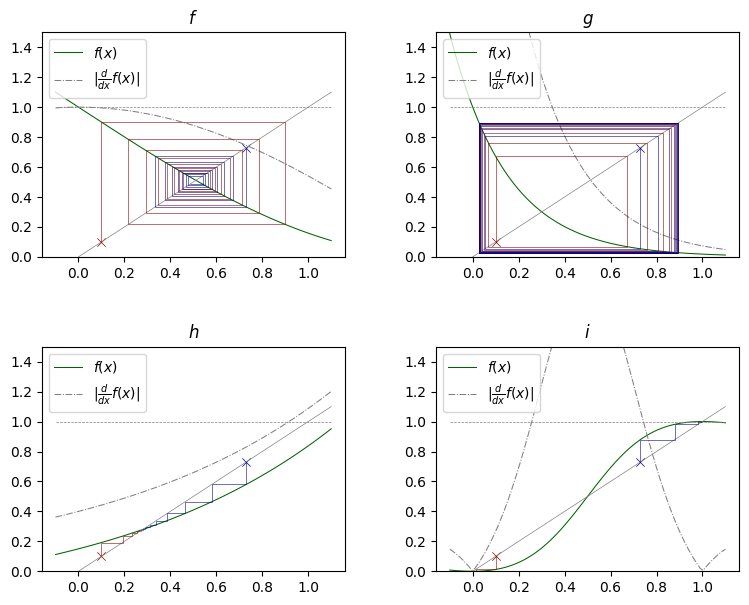

In [5]:
# functions to evaluate
funcs = [
    (lambda x: 1 - np.sin(x), 'f', lambda x: - np.cos(x)),
    (lambda x: np.exp(-4*x), 'g', lambda x: -4*np.exp(-4*x)),
    (lambda x: 0.4*np.exp(x)-0.25, 'h', lambda x: 0.4*np.exp(x)),
    (lambda x: 1/(1 + ((1 - x)/x)**2), 'i', lambda x: (2*x*(1 - x))/(2*x**2 - 2*x + 1)**2)
]

# parameters
x_arr = np.linspace(-0.1, 1.1, 100)
starting_p = [(0.1, 'darkred'), (0.73, 'darkblue')]
npicard = 15
tol = 1e-10

# plots
fig = plt.figure(figsize=(9, 7))

for i, func in enumerate(funcs):
    # plot
    plt.subplot(2, 2, i + 1)
    plt.plot(x_arr, func[0](x_arr), color='darkgreen', linewidth=0.75, label=r'$f(x)$')
    plt.plot(x_arr, x_arr, color='gray', linewidth=0.5)
    
    plt.hlines(1, -0.1, 1.1, color='gray', linewidth=0.5, linestyle='--') # constante y = 1
    plt.plot(x_arr, abs(func[2](x_arr)), color='gray', linestyle='-.', linewidth=0.75, label=r'$|\frac{d}{dx}f(x)|$') # derivative
    
    plt.title(rf'${func[1]}$')
    plt.legend(loc='upper left')
    plt.ylim((0, 1.5))
    
    # picard
    for j in starting_p:
        x = j[0]
        n = 0
        plt.scatter(x, x, marker='x', color=j[1], linewidth=0.5)
        while True:
            n += 1
            plt.vlines(x, x, func[0](x), linewidth=0.4, color=j[1])
            new_x = func[0](x)
            plt.hlines(func[0](x), x, new_x, linewidth=0.4, color=j[1])
            if abs(new_x - x) < tol or n >= npicard:
                break
            x = new_x

fig.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()

**Réponses:**
  1. $f(x)$:
     - Possède bien un unique point fixe sur $[0; 1]$
     - Le point fixe est attractif, en effet $|f'(x)|<1$ proche du point fixe
  2. $g(x)$:
     - Possède bien un unique point fixe sur $[0; 1]$
     - Le point fixe est répulsif, en effet $|f'(x)|>1$ proche du point fixe
  3. $h(x)$:
     - Possède bien un unique point fixe sur $[0; 1]$
     - Le point fixe est attractif, en effet $|f'(x)|<1$ proche du point fixe
  4. $i(x)$:
     - Possède trois points fixes sur $[0; 1]$
     - Le premier et le troisième sont attractifs, en effet $|f'(x)|<1$ proche de ces points fixes
     - Celui du milieu est répulsif, $|f'(x)|>1$ dans son voisinage

***

## Exercice 4 : Fonction d'itération

Soit $f(x)$ une fonction dont on cherche les zéros. Laquelle des fonctions $\Phi(x)$ suivantes est-elle, a priori, acceptable comme fonction d’itération ? Justifiez votre réponse.  <br/><br/>
&nbsp;   a) $\Phi(x) = f(x)/x$   <br/><br/>
&nbsp;   b) $\Phi(x) = (x + 1)f(x)$  <br/><br/>
&nbsp;   c) $\Phi(x) = 5f(x) + x^2 + x$   <br/><br/>
&nbsp;   d) $\Phi(x) = (x + 1) [f (x) + 1]$   <br/><br/>
&nbsp;   e) $\Phi(x) = (x + 1)f(x) + x$  

**Réponse:** à priori, seulement la fonction `e)` pourrait marcher, en effet, si $f(x)=0$, $\Phi(x)=(x+1)\cdot 0+x=x$, donc on peut chercher $\alpha$ t.q. $f(\alpha)=0$, en convergeant (avec Picard) vers $\Phi(\alpha)=\alpha$

***

## Exercice 5 : Méthode de Picard

Reprenons les fonctions de l'exercice 2

$$
\displaystyle f(x)=\frac{\cos{(x)}+x}{4}~~~\hbox{et}~~~
\displaystyle g(x)=\frac{\cos{(x)}+x^2}{4}.
$$

Nous avons montré (n'est-ce pas) qu'elles sont $K$-contractantes sur $\mathcal{R}$ dans le cas de $f(x)$ et sur, par exemple, 
$I_\pi=\displaystyle\left]-\frac{\pi}{2},\frac{\pi}{2}\right[$ dans le cas de $g(x)$.

Dans cet exercice, il vous est demandé de :

a) vérifier que la fonction $f$ admet un unique point fixe et que la suite $\{x_k\}$ obtenue par la méthode de Picard converge vers ce point fixe quel que soit le point de départ $x_0$ de la méthode :
   * représentez graphiquement la fonction $f$ ;
   * vérifiez "visuellement" l'existence d'un unique point fixe ;
   * trouvez une valeur approchée à 5 décimales de ce point fixe grâce à la méthode de Picard, en testant votre implémentation avec différentes valeurs de départ $x_0$.

b) vérifier de manière analogue le théorème du point fixe du cours dans le cas particulier de la fonction $g$ sur $I_\pi$. Ce théorème s'applique-t-il dans le cas de cette fonction sur l'intervalle $\displaystyle\left]-\frac{\pi}{2},0\right[$ ?

Valeur approchée: 0.3167504189712746


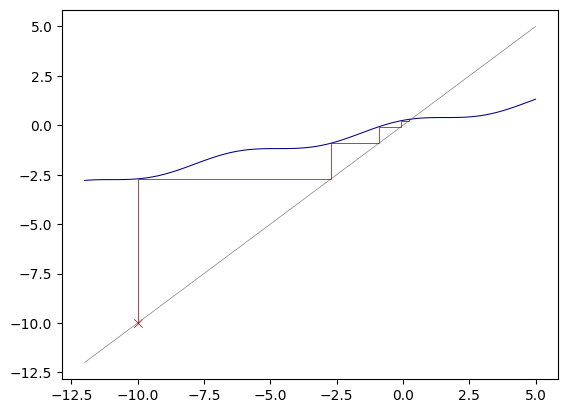

In [6]:
f = lambda x: (np.cos(x) + x) / 4 
x_arr = np.linspace(-12, 5, 100)
tol = 1e-5


plt.plot(x_arr, f(x_arr), color='navy', linewidth=0.75)
plt.plot(x_arr, x_arr, color='gray', linewidth=0.5)

# picard
x_0 = -10
x = x_0

plt.scatter(x, x, marker='x', color='darkred', linewidth=0.5)

while True:
    plt.vlines(x, x, f(x), color='darkred', linewidth=0.5)
    new_x = f(x)
    plt.hlines(f(x), f(x), x, color='darkred', linewidth=0.5)
    if abs(new_x - x) <= tol:
        print(f'Valeur approchée: {new_x}')
        break
    x = new_x

plt.show()

Valeur approchée: 0.2583922875620923


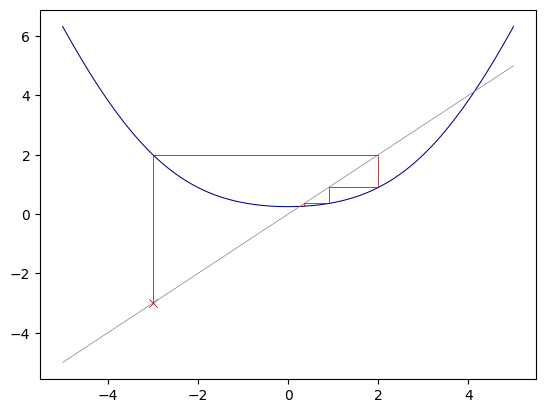

In [7]:
g = lambda x: (np.cos(x) + x**2) / 4 
x_arr = np.linspace(-5, 5, 100)
tol = 1e-5


plt.plot(x_arr, g(x_arr), color='navy', linewidth=0.75)
plt.plot(x_arr, x_arr, color='gray', linewidth=0.5)

# picard
x_0 = -3
x = x_0

plt.scatter(x, x, marker='x', color='darkred', linewidth=0.5)

while True:
    plt.vlines(x, x, g(x), color='darkred', linewidth=0.5)
    new_x = g(x)
    plt.hlines(g(x), g(x), x, color='darkred', linewidth=0.5)
    if abs(new_x - x) <= tol:
        print(f'Valeur approchée: {new_x}')
        break
    x = new_x

plt.show()


Comme dans l'exercice 2, le théorème du point fixe s'applique pour tout $\sim-2.354\le x\le\;\sim2.354$, donc la méthode de Picard est garantie de converger $\forall x\in [\sim-2.354;\sim2.354]$\
On observe qu'elle converge d'ailleurs pour des valeurs en dehors de cet intervalle, mais ce n'est qu'un "coup de chance"